In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tkinter as tk
from tkinter import filedialog

In [3]:
data_dir = 'D:/machineLeData/Face_Mask_Dataset/Train'
data_dir = pathlib.Path(data_dir)

In [4]:
batch_size = 16
img_height = 64
img_width = 64

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,validation_split=0.2,subset="training",seed=123,
image_size=(img_height, img_width),batch_size=batch_size)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,validation_split=0.2,subset="validation",seed=123,
image_size=(img_height, img_width),batch_size=batch_size)

Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['WithMask', 'WithoutMask']


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # it will decrease the time for training 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = 2

In [10]:
model= Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'), # padding = 'same' means output is the same size as input. and kernal size (3 x 3)
                                                        # here we learn a total of 16 filters. Max pooling is then used to reduce the spatial dimensions of the output volume.
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'), # as we are going closer to the output ,, we learn more numbers of filter here is 32.
                                                        # whenever layers.Conv2D called previous layers.Conv2D become input for it . 
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),# final Conv2D layer learns 64 filters.
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # Dropout’s purpose is to help your network generalize and not overfit. 
    
    # Fully connected layer
    layers.Flatten(), # it will convert 2d image array to 1d
    layers.Dense(64,activation='relu'), # (hidden layer) here we are catching 64 nodes that we passed it in the ConveD ,, if we reduse it to 50 or something else we may loss some features
    layers.Dense(num_classes) # (hidden layer) here all the 64 nodes connected to 2 output as it is number of classes 
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

In [12]:
noepochs=7
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
mymodel = model.fit(train_ds,validation_data=val_ds,epochs=noepochs)

acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']
loss = mymodel.history['loss']
val_loss=mymodel.history['val_loss']
epochs_range = range(noepochs)

Epoch 1/7
500/500 [==============================] - 36s 50ms/step - loss: 0.2039 - accuracy: 0.9125 - val_loss: 0.0541 - val_accuracy: 0.9810
Epoch 2/7
500/500 [==============================] - 24s 47ms/step - loss: 0.0499 - accuracy: 0.9819 - val_loss: 0.0211 - val_accuracy: 0.9945
Epoch 3/7
500/500 [==============================] - 24s 48ms/step - loss: 0.0276 - accuracy: 0.9907 - val_loss: 0.0385 - val_accuracy: 0.9870
Epoch 4/7
500/500 [==============================] - 24s 48ms/step - loss: 0.0271 - accuracy: 0.9896 - val_loss: 0.0248 - val_accuracy: 0.9905
Epoch 5/7
500/500 [==============================] - 23s 45ms/step - loss: 0.0187 - accuracy: 0.9916 - val_loss: 0.0192 - val_accuracy: 0.9945
Epoch 6/7
500/500 [==============================] - 22s 45ms/step - loss: 0.0233 - accuracy: 0.9902 - val_loss: 0.1009 - val_accuracy: 0.9645
Epoch 7/7
500/500 [==============================] - 23s 45ms/step - loss: 0.0187 - accuracy: 0.9932 - val_loss: 0.0406 - val_accuracy: 0.9905

Text(0.5, 1.0, 'Training and Validation Accuracy')

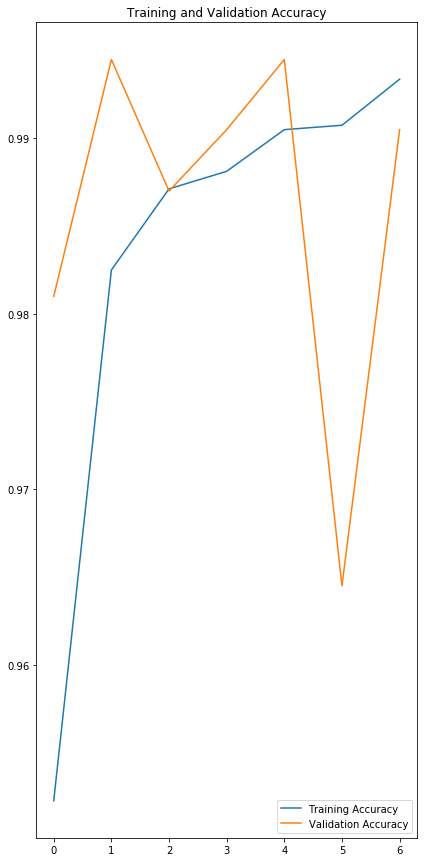

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

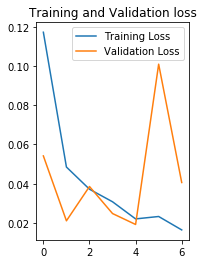

In [17]:
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

In [18]:
def recogout():
    root = tk.Tk()
    root.withdraw()
    img_path = filedialog.askopenfilename()
    img = keras.preprocessing.image.load_img(img_path,target_size=(img_height,img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print("This image most likely belong to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [19]:
recogout()

This image most likely belong to WithoutMask with a 99.63 percent confidence


In [20]:
recogout()

This image most likely belong to WithMask with a 100.00 percent confidence
